In [1]:
import sys
sys.path.insert(0, "../")
import pandas as pd

from skimage.io import imread
from ufish.api import UFish

In [2]:
# create a new instance of UFish
ufish = UFish(cuda=True)

In [3]:
# Load model from internet
ufish.load_weights_from_internet()
# or load model from local file:
# ufish.load_weights('path/to/weights.pth')

2023-07-30 11:09:40.981 | INFO     | ufish.api:load_weights_from_internet:78 - Local weights C:\Users\Nangu\.ufish\v1-for_benchmark.pth exists, skip downloading.
2023-07-30 11:09:41.548 | INFO     | ufish.api:_init_model:46 - CUDA is available, using GPU.
2023-07-30 11:09:41.549 | INFO     | ufish.api:load_weights:61 - Loading weights from C:\Users\Nangu\.ufish\v1-for_benchmark.pth.


In [4]:
data_dir = '../tmp/FISH_spots/'  # dataset root dir
meta_data = pd.read_csv('./meta_test.csv')  # load the meta data

In [5]:
img = imread(data_dir + "/image/deepblink_1.tif")

In [6]:
ufish.enhance_img(img)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
pred = ufish.pred_2d(img)

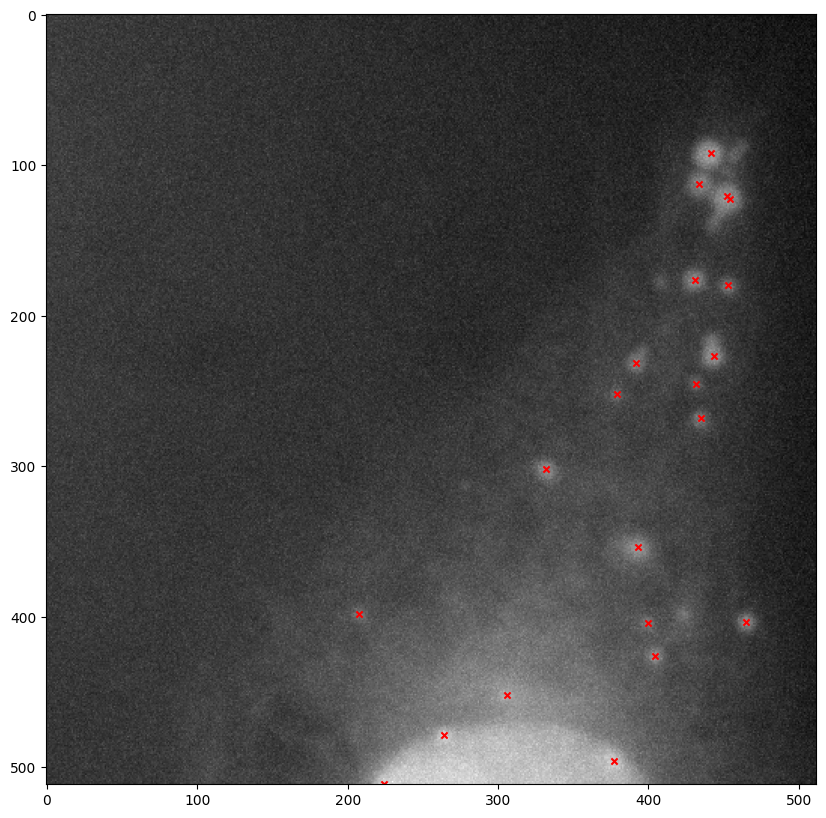

In [8]:
fig = ufish.plot_result(img, pred)

In [9]:
true = pd.read_csv(data_dir + 'csv/deepblink_1.csv')

In [10]:
eval_df = ufish.evaluate_result(pred, true)
eval_df.tail(3)

,cutoff,f1_score,abs_euclidean,offset,f1_integral,mean_euclidean
47,2.877551,0.863636,0.740222,"[(1.1243597142857027, 0.0013041428571796132), ...",0.65167,0.676167
48,2.938776,0.863636,0.740222,"[(1.1243597142857027, 0.0013041428571796132), ...",0.65167,0.676167
49,3.000000,0.863636,0.740222,"[(1.1243597142857027, 0.0013041428571796132), ...",0.65167,0.676167


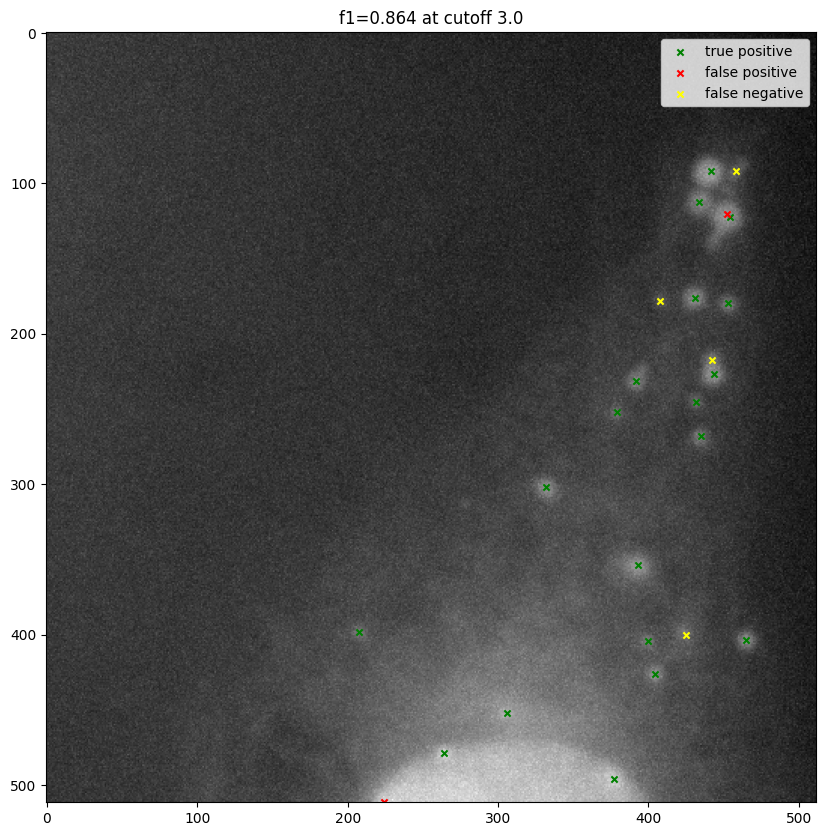

In [11]:
fig = ufish.plot_evaluate(img, pred, true)